In [23]:
# Data Handling & Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


In [24]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display dataset information
print("\n🔹 Dataset Overview:")
print(df.info())

# Show first 5 rows
print("\n🔹 First 5 Rows:")
print(df.head())



🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [25]:
# Remove 'customerID' (not useful for predictions)
if "customerID" in df.columns:
    df.drop("customerID", axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (fix errors)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values in 'TotalCharges' with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [26]:
# Convert categorical columns into numerical values
label_enc = LabelEncoder()
for column in df.select_dtypes(include="object").columns:
    df[column] = label_enc.fit_transform(df[column])

# Confirm data types after encoding
print("\n🔹 Data Types After Encoding:")
print(df.dtypes)



🔹 Data Types After Encoding:
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


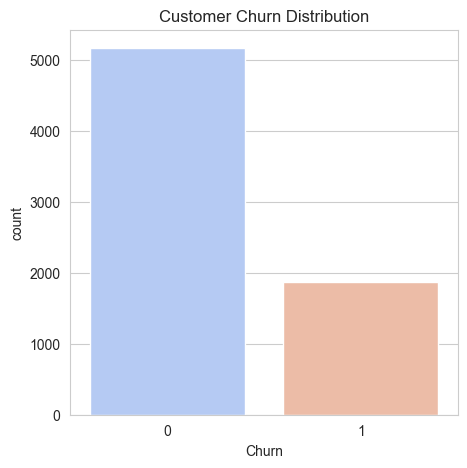

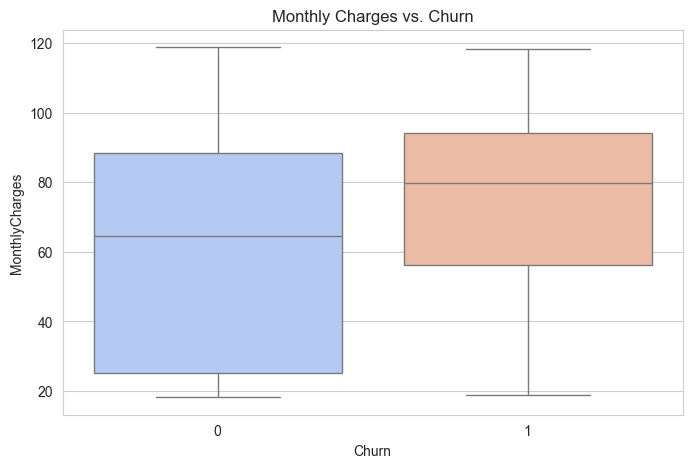

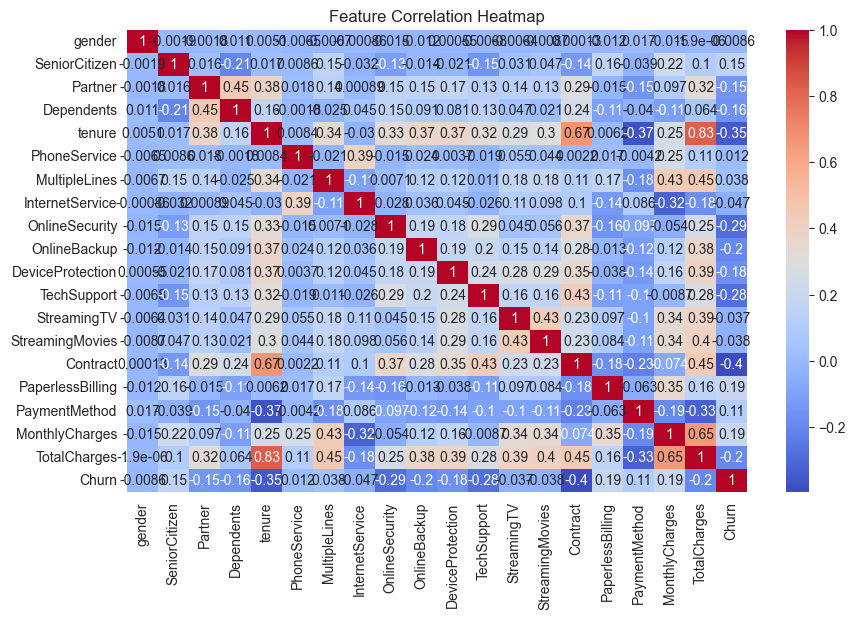

In [27]:
# Set visual style
sns.set_style("whitegrid")

# Churn Distribution
plt.figure(figsize=(5,5))
sns.countplot(x="Churn", data=df, hue="Churn", palette="coolwarm", legend=False)
plt.title("Customer Churn Distribution")
plt.show()

# Monthly Charges vs. Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, hue="Churn", palette="coolwarm", legend=False)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [28]:
# Define Features (X) and Target Variable (y)
X = df.drop("Churn", axis=1)  # Features
y = df["Churn"]  # Target (1 = Churn, 0 = Not Churn)

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Make Predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Models
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Print Accuracy
print(f"\n🔹 Logistic Regression Accuracy: {log_acc:.2f}")
print(f"🔹 Random Forest Accuracy: {rf_acc:.2f}")



🔹 Logistic Regression Accuracy: 0.82
🔹 Random Forest Accuracy: 0.80



🔹 Best Model Confusion Matrix:
 [[933 103]
 [157 216]]

🔹 Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



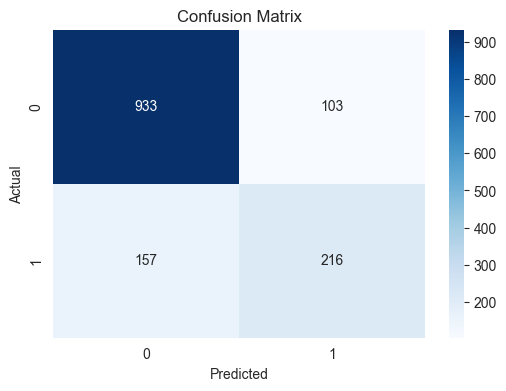

In [31]:
# Choose Best Model
best_model = rf_model if rf_acc > log_acc else log_model
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("\n🔹 Best Model Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\n🔹 Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
